In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dataPath = './heart.csv'
data = pd.read_csv(dataPath)

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


([<matplotlib.patches.Wedge at 0x7fe5cdbff550>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

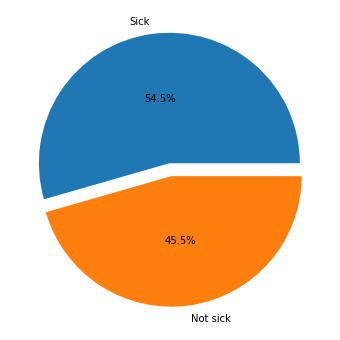

In [27]:
# 确诊为病患。
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=['Sick', 'Not sick'], pctdistance=0.5)

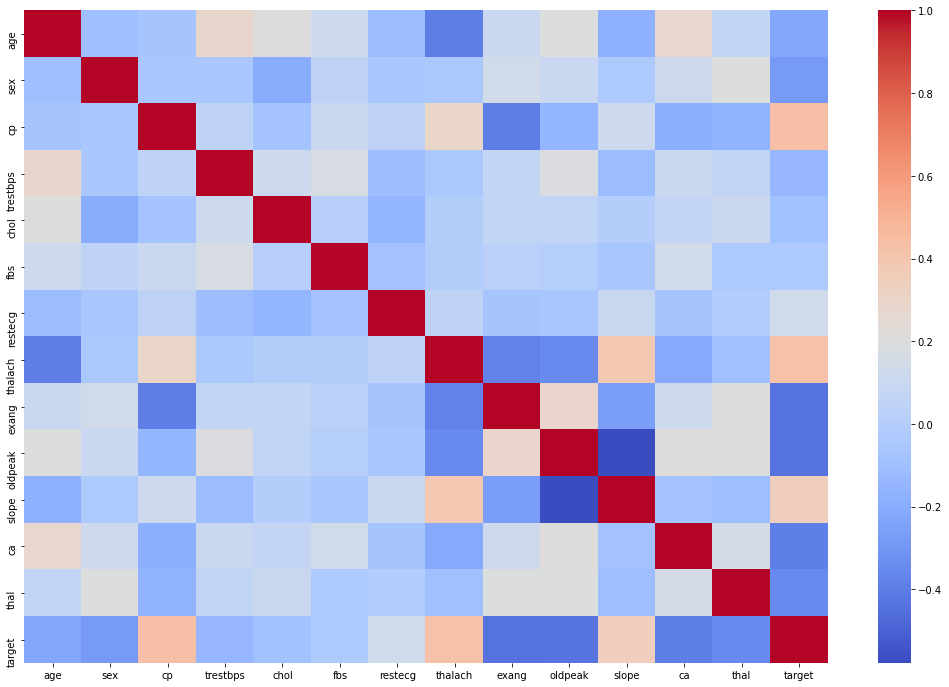

In [28]:
# 查看特征相关系数图
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(data.corr(),ax= ax, cmap='coolwarm');

In [29]:
# 查看特征之间的相关系数具体数值
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 数据处理
### 问题1：Onehot编码
&emsp;&emsp;请对data数据中需要进行Onehot的特征列，进行Onehot编码处理。<br>

In [30]:
# Onehot编码
data = pd.get_dummies(data, columns=['cp','restecg','slope','thal'])

In [31]:
# 打印数据info，查看Onehot编码
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   target     303 non-null    int64  
 10  cp_0       303 non-null    uint8  
 11  cp_1       303 non-null    uint8  
 12  cp_2       303 non-null    uint8  
 13  cp_3       303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  slope_0    303 non-null    uint8  
 18  slope_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  thal_0    

### 问题2：数据、标签划分
&emsp;&emsp;请对data数据进行标签划分，划分出x_data（Data）与y_data(Laber)。<br>

In [32]:
# 将data数据划分
x_data = data.drop(['target'],axis=1)
y_data = data.target.values

### 问题3：归一化处理
&emsp;&emsp;请对所有数据列进行归一化处理。<br>

In [33]:
# 对x_data进行归一化处理
standardScaler = StandardScaler()
standardScaler.fit(x_data)
X_train = standardScaler.transform(x_data)

### 问题4：训练、测试集划分
&emsp;&emsp;请对数据与标签进行训练集、测试集划分，划分比例为：测试集占30%。<br>

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=33)

### 问题5：模型定义、训练及评估
&emsp;&emsp;请完成LogisticRegression模型的定义、训练及评估。<br>

In [35]:
# 定义模型
model = LogisticRegression(max_iter=1000)

In [36]:
# 模型训练
model.fit(X_train,y_train)

/Users/bubble/opt/miniconda3/envs/pt/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [37]:
# 模型评估
model.score(X_train,y_train)

0.8773584905660378

In [38]:
# 使用测试数据对模型进行评估
model.score(X_test,y_test)

0.8461538461538461

### 问题6：检查主要评价指标
&emsp;&emsp;请使用主要评价指标对模型进行评价。<br>

In [39]:
# 使用X_test数据进行模型预测
y_predict = model.predict(X_test)

In [40]:
# 评价指标对模型
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.80      0.88      0.84        41

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

